In [71]:
import theano.tensor as T

In [72]:
c = T.scalar('c')
v = T.vector('v')
A = T.matrix('A')

In [73]:
w = A.dot(v)

In [74]:
import theano

In [75]:
matrix_times_vector = theano.function(inputs=[A,v], outputs=w)

In [76]:
import numpy as np
A_val = np.array([[1,2], [3,4]])
v_val = np.array([5,6])

w_val = matrix_times_vector(A_val, v_val)
w_val

array([17., 39.])

In [77]:
x = theano.shared(20.0, 'x')

In [78]:
cost = x*x + x + 1 

In [79]:
x_update = x - 0.3 * T.grad(cost, x)

In [80]:
train = theano.function(inputs=[], outputs=cost, updates=[(x, x_update)])

In [81]:
for i in range(25):
  cost_val = train()
  print(cost_val)
  
print(x.get_value())

421.0
67.99000000000001
11.508400000000002
2.4713440000000007
1.0254150400000002
0.7940664064
0.7570506250240001
0.75112810000384
0.7501804960006143
0.7500288793600982
0.7500046206976159
0.7500007393116186
0.750000118289859
0.7500000189263775
0.7500000030282203
0.7500000004845152
0.7500000000775223
0.7500000000124035
0.7500000000019845
0.7500000000003176
0.7500000000000506
0.7500000000000082
0.7500000000000013
0.7500000000000001
0.7500000000000001
-0.4999999976919052


In [91]:
import matplotlib.pyplot as plt

x_axis = np.arange(-25, 25, 0.1)

def cost(x):
  return x*x + x +1 

def derivative_cost(x):
  return 2*x + 1

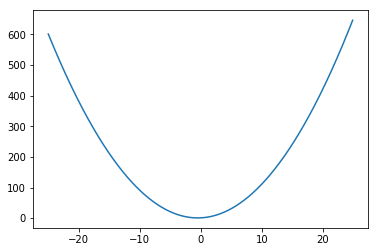

In [92]:
plt.plot(x_axis, cost(x_axis))

In [95]:
x = 20
cost(20)

421

In [102]:
derivative_of_cost_wrt_x = derivative_cost(x)
learning_rate = 0.3
x_update = x - learning_rate * derivative_of_cost_wrt_x
x_update

7.700000000000001

In [103]:
cost(x_update)

67.99000000000001

## Neural Network

In [111]:
import numpy as np
import theano
import theano.tensor as T
import pandas as pd

In [112]:
"""Takes in raw X, subtracts mean, and divides by standard deviation"""
def get_normalized_data():
    print("Reading in and transforming data...")
    df = pd.read_csv('../../../data/MNIST/train.csv')
    data = df.as_matrix().astype(np.float32)
    np.random.shuffle(data)
    X = data[:, 1:]
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    np.place(std, std == 0, 1)
    X = (X - mu) / std # normalize the data
    Y = data[:, 0]
    return X, Y
  
"""Function that creates an indicator matrix from y (one hot encoding)"""
def y2indicator(y):
    N = len(y)
    y = y.astype(np.int32)
    ind = np.zeros((N, 10))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind
  
def error_rate(p, t):
  return np.mean(p != t)

def relu(a):
  return a * (a > 0)

In [160]:
def main():
  X, Y = get_normalized_data()
  
  max_iter = 20
  print_period = 10
  
  lr = 0.00004
  reg = 0.01
  
  Xtrain = X[:-1000,]
  Ytrain = Y[:-1000]
  Xtest  = X[-1000:,]
  Ytest  = Y[-1000:]
  Ytrain_ind = y2indicator(Ytrain)
  Ytest_ind = y2indicator(Ytest)
  
  N, D = Xtrain.shape
  batch_sz = 500
  n_batches = N // batch_sz
  
  M = 300   # 300 hidden units
  K = 10    # 10 classes 
  W1_init = np.random.randn(D, M) / np.sqrt(D)
  b1_init = np.zeros(M)
  W2_init = np.random.randn(M, K) / np.sqrt(M)
  b2_init = np.zeros(K)
  
  """------------- Step 2: Define theano variables and expressions ---------------"""
  thX = T.matrix('X')                  # Placeholder for X input matrix
  thT = T.matrix('T')                  # Placeholder for the targets
  W1 = theano.shared(W1_init, 'W1')    # All parameters will be shared variables
  b1 = theano.shared(b1_init, 'b1')    # Shared variable: first arg is initial value
  W2 = theano.shared(W2_init, 'W2')    # second arg is name
  b2 = theano.shared(b2_init, 'b2')
  
  thZ = relu( thX.dot(W1) + b1)                # Create function to solve for Z using relu
  thY = T.nnet.softmax( thZ.dot(W2) + b2)      # Create function to solve for Y using softmax
  

Reading in and transforming data...
